In [34]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Cargar los datos desde el archivo CSV
diamonds = pd.read_csv("diamonds.csv")

In [35]:
# 3.1 Preprocesamiento de datos
diamonds.isnull().sum()
# No es necesario realizar preprocesamiento en este caso, ya que los datos parecen estar limpios.


Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

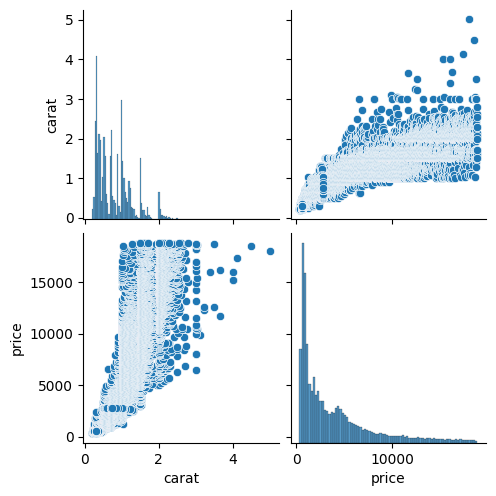

In [41]:


# 3.2 Visualización de datos
# Visualicemos algunos aspectos de los datos para comprender mejor su distribución y relaciones.
sns.pairplot(diamonds[['carat', 'cut', 'color', 'clarity', 'price']])
plt.show()


In [37]:

# 3.3 Dividir el conjunto de datos en entrenamiento y prueba
X = diamonds[['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'depth', 'table']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

X_train = pd.get_dummies(X_train, columns=['cut', 'color', 'clarity'])
X_test = pd.get_dummies(X_test, columns=['cut', 'color', 'clarity'])


In [39]:
# Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Bosque Aleatorio
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [40]:
# Evaluar los modelos
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R^2: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Regresión Lineal")
evaluate_model(y_test, y_pred_rf, "Bosque Aleatorio")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

# 3.5 Mejoras y reflexiones
# - Puedes probar otros algoritmos de regresión como Support Vector Regression (SVR) o Gradient Boosting.
# - Realizar una búsqueda de hiperparámetros para optimizar los modelos.
# - Ingeniería de características: considerar la creación de nuevas características a partir de las existentes.
# - Escalar o normalizar características si es necesario.
# - Manejar valores atípicos en los datos.
# - Explorar técnicas avanzadas como redes neuronales para mejorar la precisión.


Regresión Lineal - MSE: 1288705.48, R^2: 0.92
Bosque Aleatorio - MSE: 302478.17, R^2: 0.98
XGBoost - MSE: 318015.37, R^2: 0.98
